# Testing our model

In [1]:
import os
import random
import math
import numpy as np
import cv2 #used to draw the masks
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
import pandas as pd
from sklearn.model_selection import KFold
from PIL import Image
import pickle as pkl

In /usr/remote/anaconda-3.7-2020-05-28/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /usr/remote/anaconda-3.7-2020-05-28/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /usr/remote/anaconda-3.7-2020-05-28/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /usr/remote/anaconda-3.7-2020-05-28/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /usr/

In [2]:
from util.DetectorDataset import DetectorDataset
from util.DetectorConfig import DetectorConfig

In [7]:
DATA_DIR = './beta_test_imgs/00004461_016.png' #Directory where Bounding box images are located

ROOT_DIR = './saved_models' # Directory to save logs and trained model

In [8]:
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

In [9]:
ORIG_SIZE = 1024

In [6]:
image_annotations_val = pd.read_csv(DATA_DIR + '/BBox_test.csv')
print(image_annotations_val.head())

        Image Index Finding Label     Bbox [x           y           w  \
0  00028620_000.png   Atelectasis  798.611640  668.579894  153.870899   
1  00019706_014.png   Atelectasis  663.161905  435.606349  171.208466   
2  00021377_016.png   Atelectasis  723.843386  672.914286  174.459259   
3  00000830_000.png   Atelectasis  575.390476  489.786243  280.651852   
4  00016490_011.png   Atelectasis  183.128042  523.377778  167.957672   

           h]  
0   83.437037  
1  140.867725  
2  101.858201  
3  115.944974  
4   63.932275  


In [7]:
dataset_val = DetectorDataset(image_annotations_val, ORIG_SIZE)
dataset_val.prepare()

In [8]:
class InferenceConfig(DetectorConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 9
    
    MAX_GT_INSTANCES = 2
    
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.78
    DETECTION_NMS_THRESHOLD = 0.01

inference_config = InferenceConfig()

model_path = ROOT_DIR + '/mrcnn_final_model.h5'

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode='inference', 
                          config=inference_config,
                          model_dir=model_path)

# Load trained weights (fill in path to trained weights here)

print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  ./saved_models/mrcnn_final_model.h5







In [9]:
from sklearn.utils import shuffle

In [10]:
disease_map = {'Atelectasis' : 1, 'Cardiomegaly' : 2, 'Effusion' : 3, 'Infiltrate': 4, 'Mass' : 5, 'Nodule' : 6, 'Pneumonia' : 7, 'Pneumothorax' : 8}

In [11]:
def get_colors_for_class_ids(class_ids):
    colors = []
    for class_id in class_ids:
        if class_id == 1:
            colors.append((.941, .204, .204))
        elif class_id == 2:
            colors.append((.204, .204, .204))
        elif class_id == 3:
            colors.append((.204, .941, .204))
        elif class_id == 4:
            colors.append((.204, .204, .941))
        elif class_id == 5:
            colors.append((.941, .941, .204))
        elif class_id == 6:
            colors.append((.941, .204, .941))
        elif class_id == 7:
            colors.append((.204, .941, .941))
        elif class_id == 8:
            colors.append((.941, .941, .941))
        elif class_id == 9:
            colors.append((0.0, 0.0, 0.0))
    return colors

In [15]:
OUTPUT_DIR = './mrcnn_out_imgs/'

In [30]:
with open('saved_models/diseases.pickle', 'rb') as f:
    disease_pkl = pkl.load(f)


*** No instances to display *** 



/home/aed018/.conda/envs/deepmedia/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()



*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 



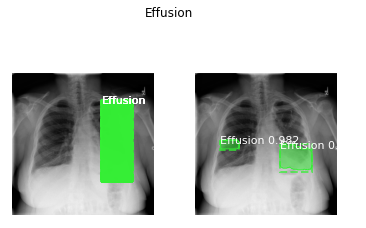

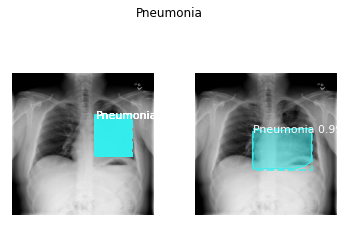

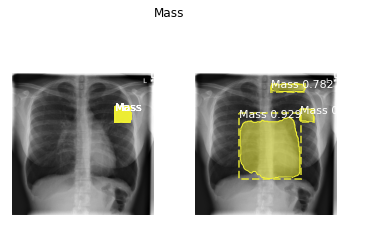

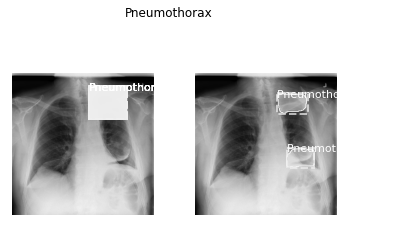

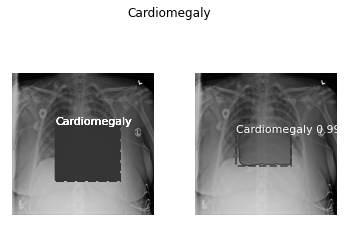

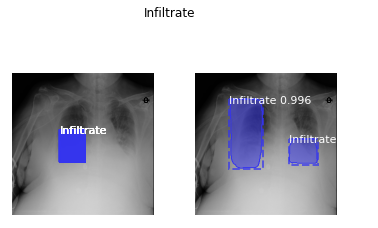

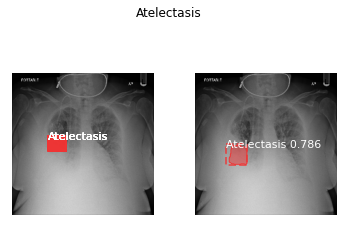

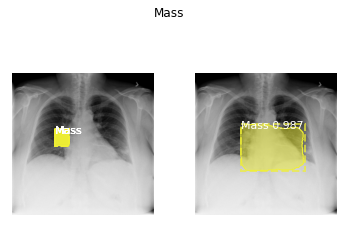

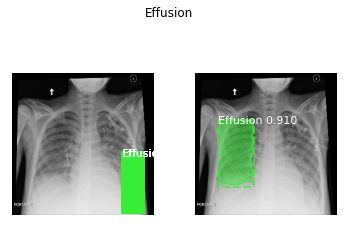

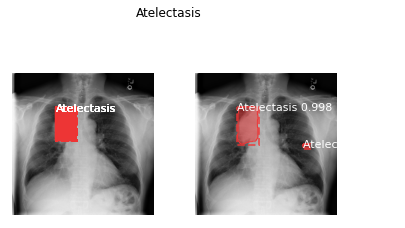

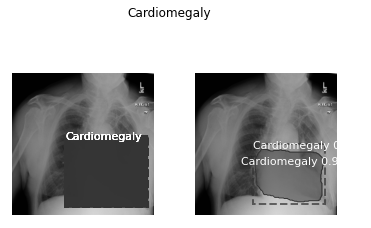

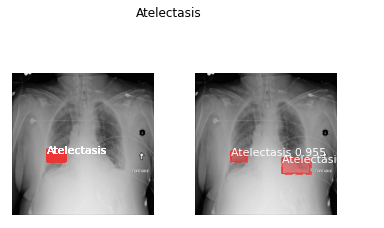

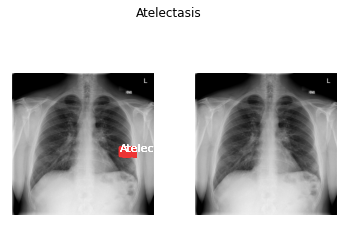

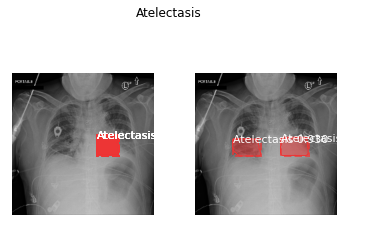

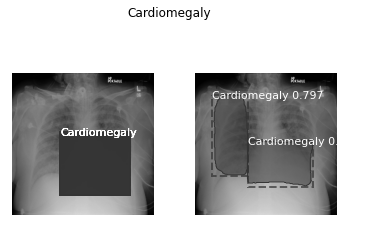

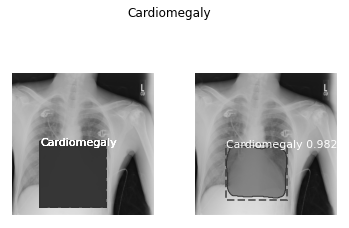

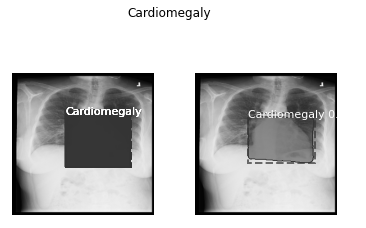

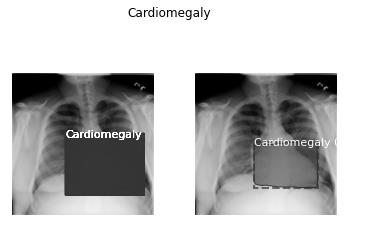

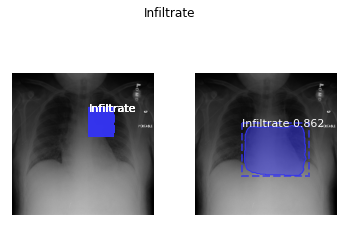

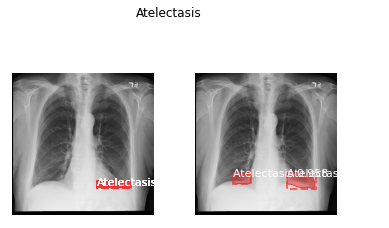

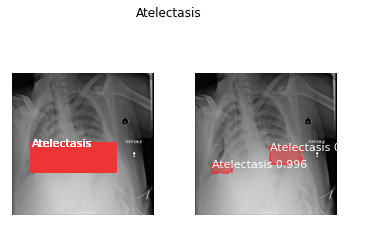

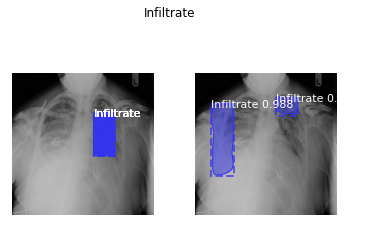

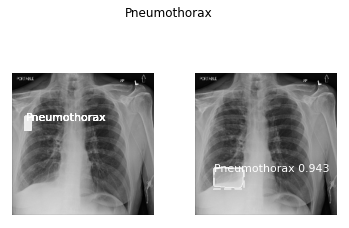

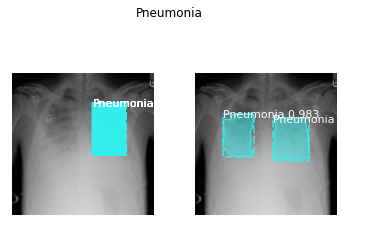

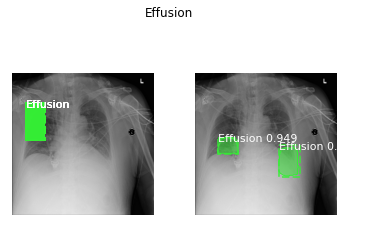

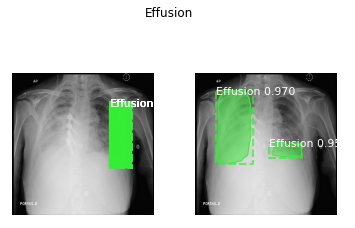

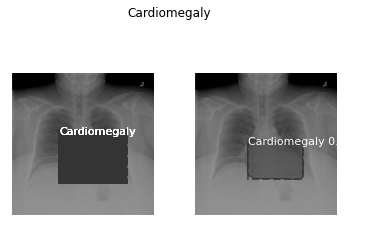

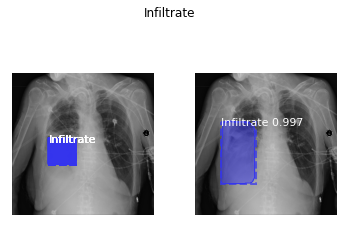

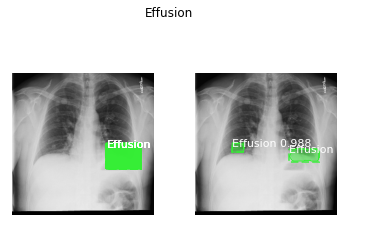

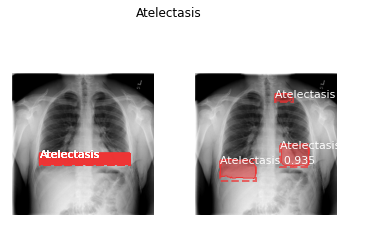

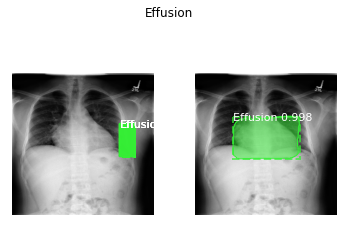

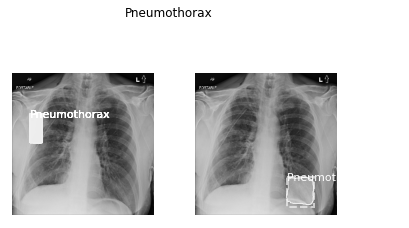

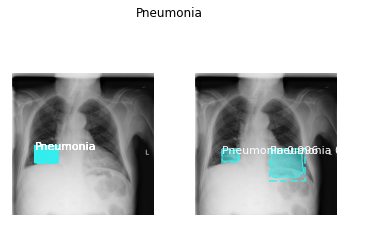

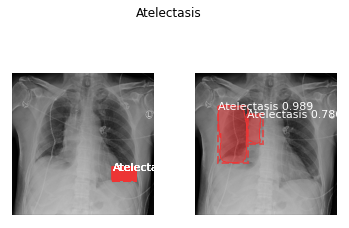

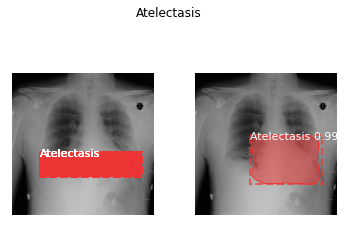

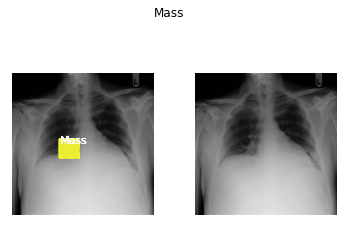

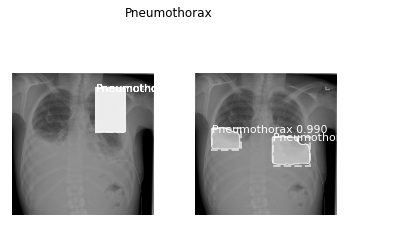

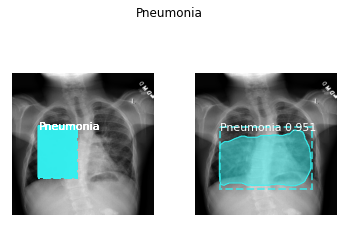

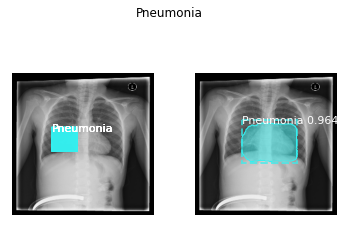

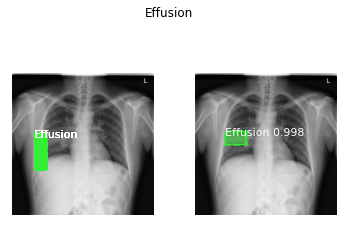

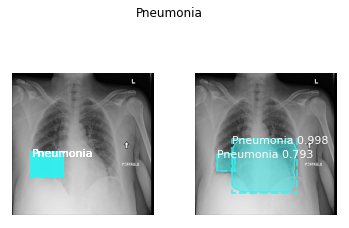

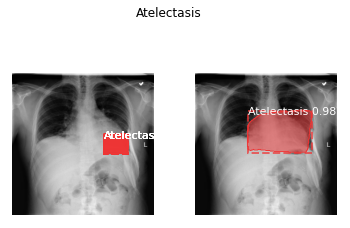

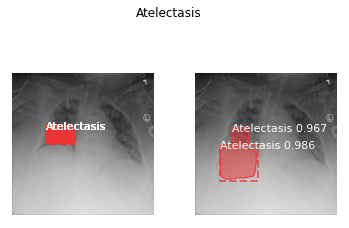

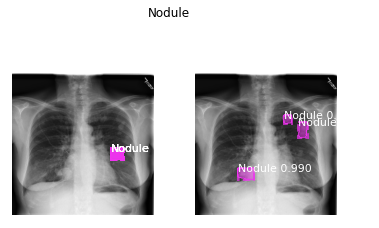

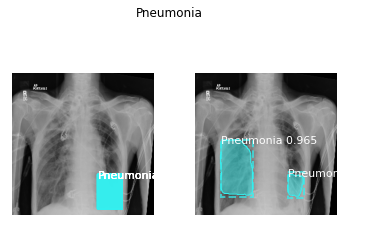

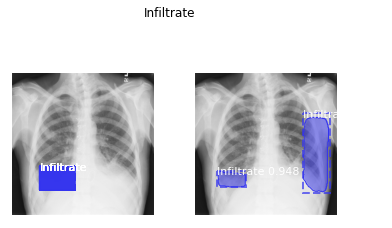

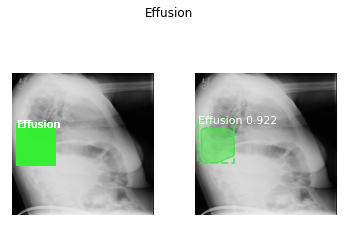

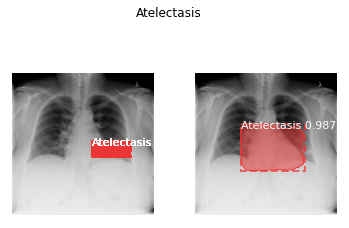

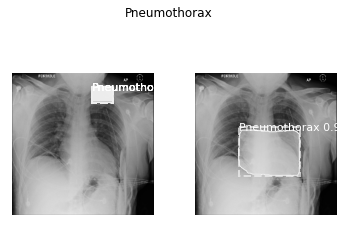

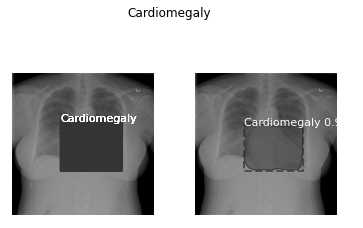

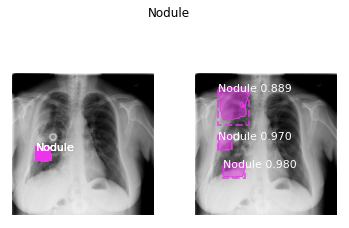

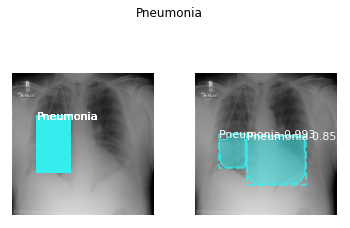

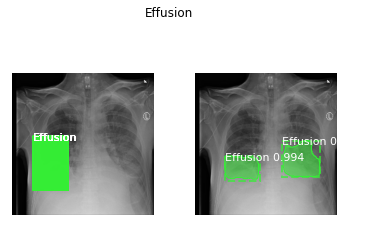

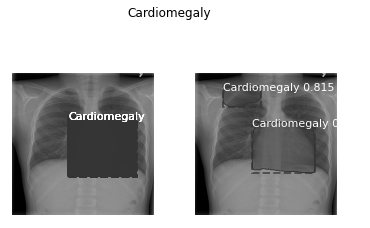

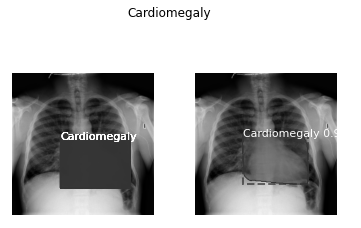

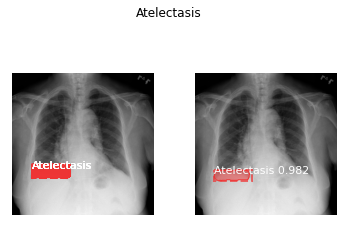

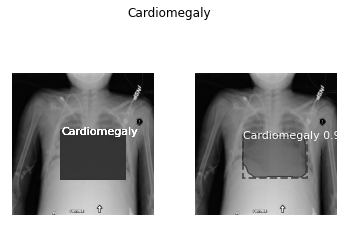

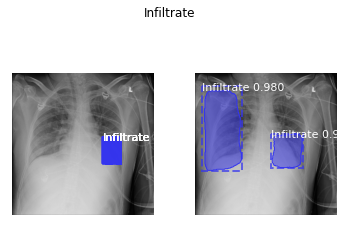

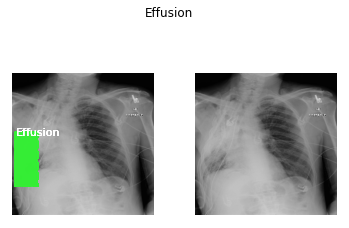

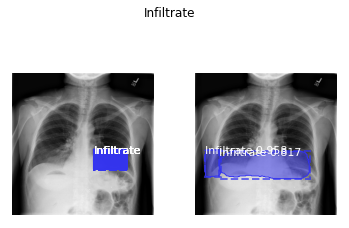

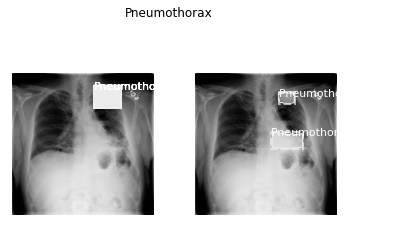

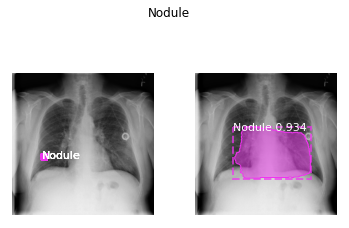

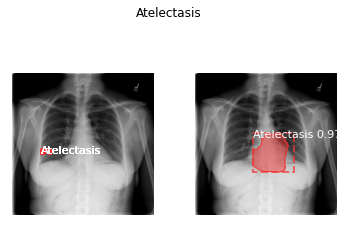

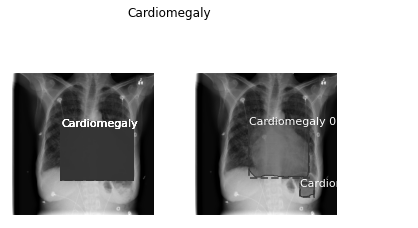

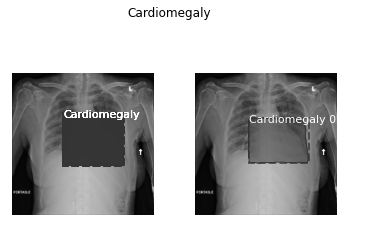

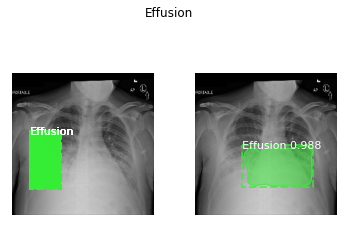

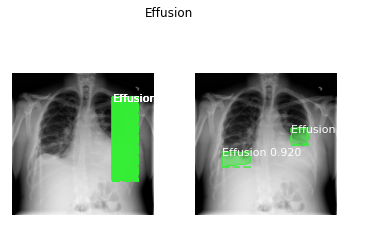

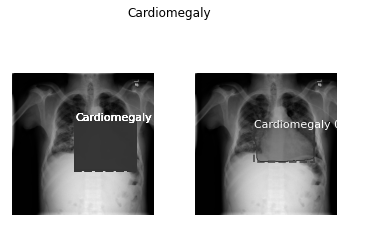

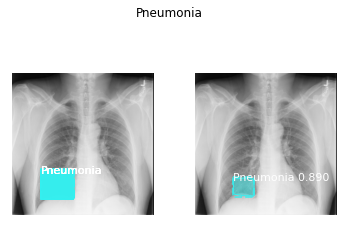

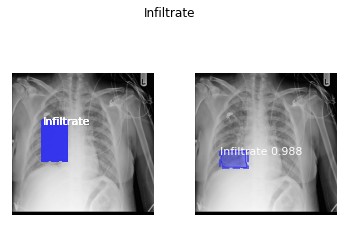

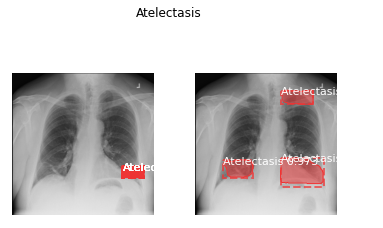

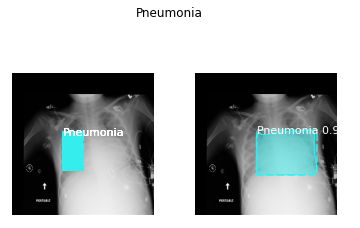

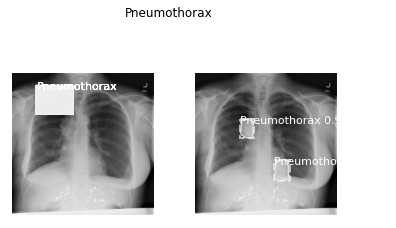

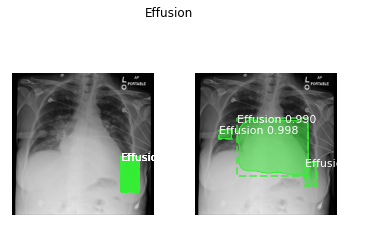

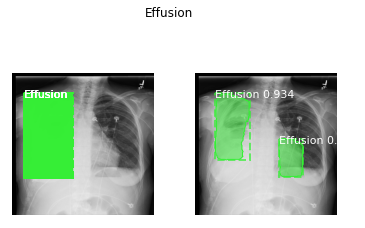

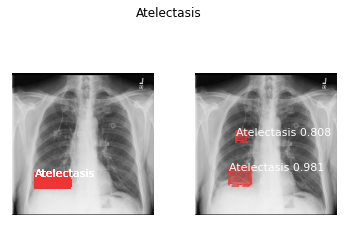

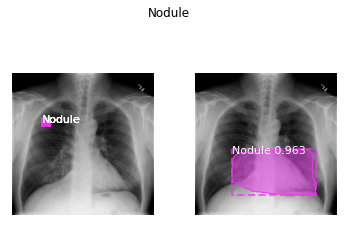

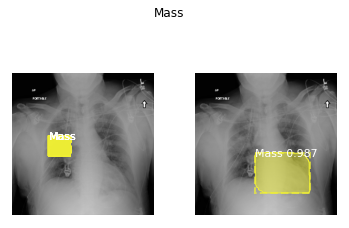

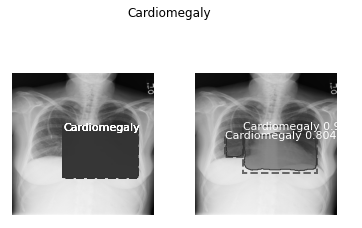

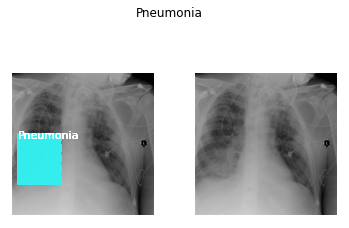

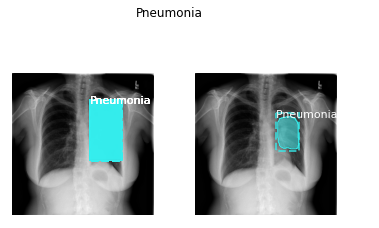

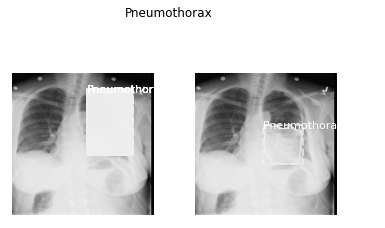

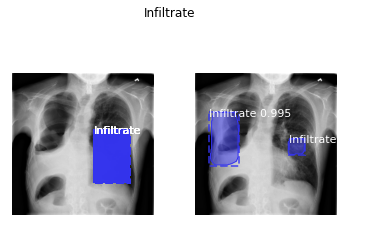

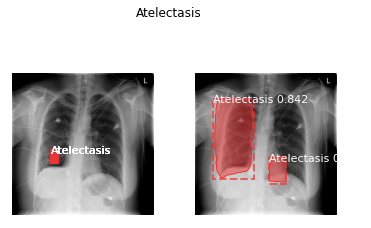

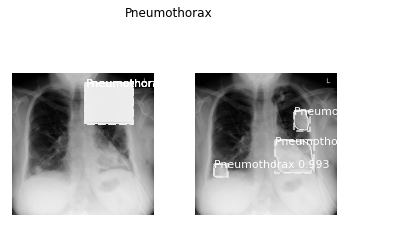

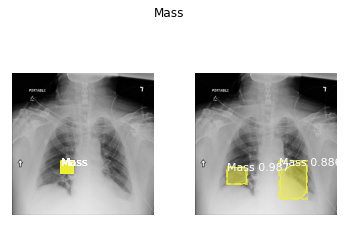

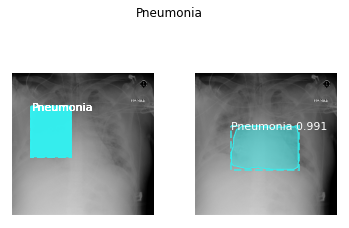

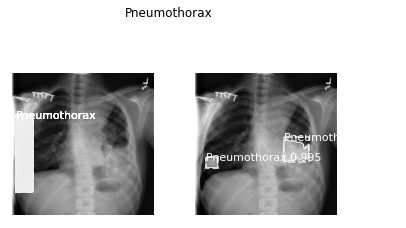

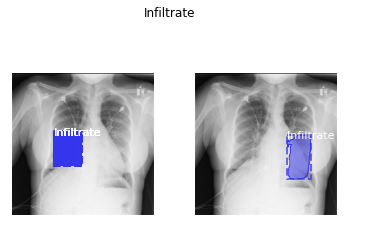

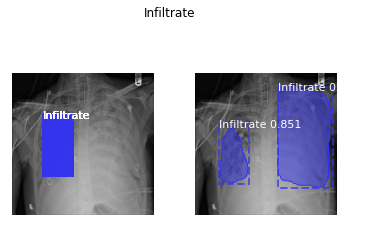

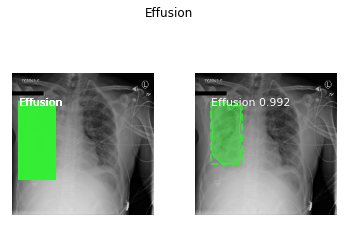

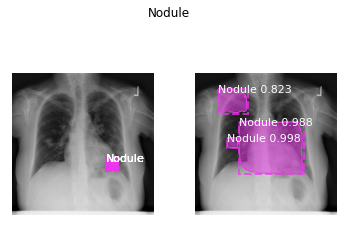

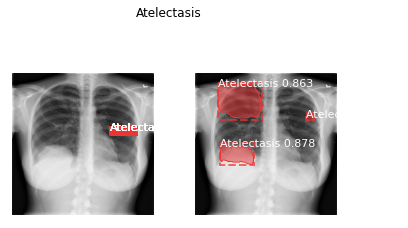

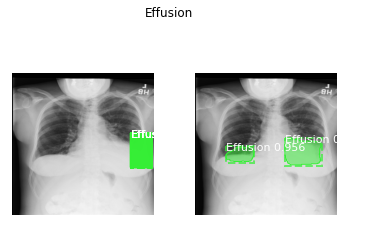

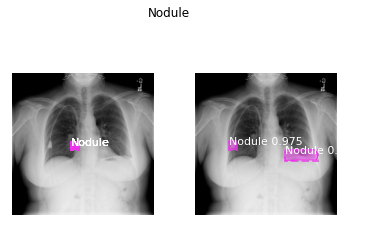

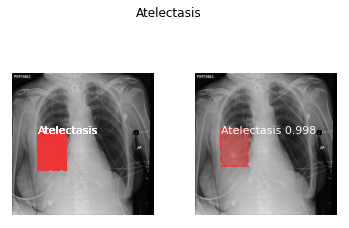

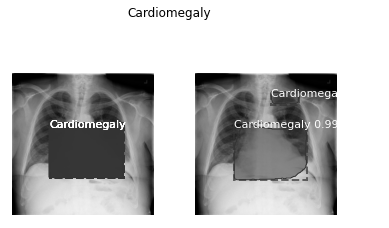

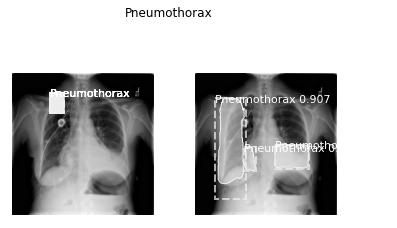

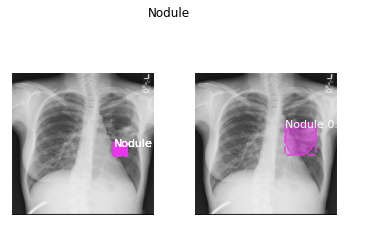

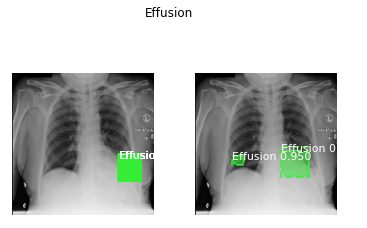

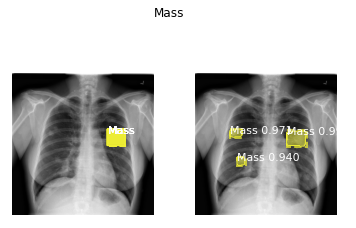

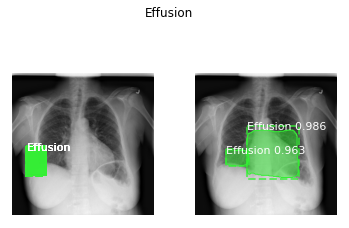

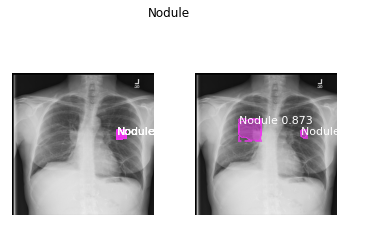

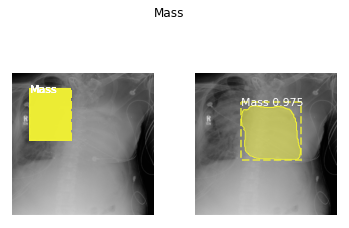

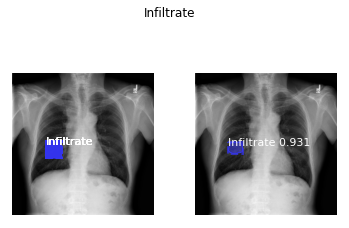

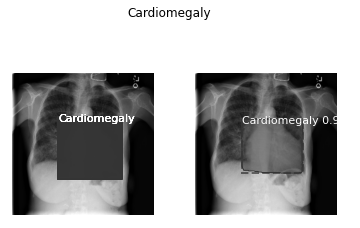

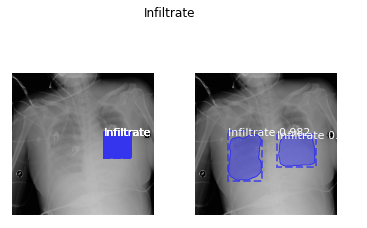

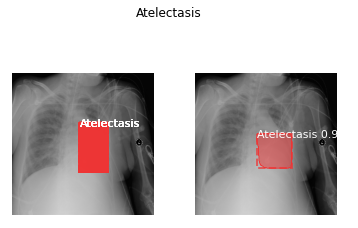

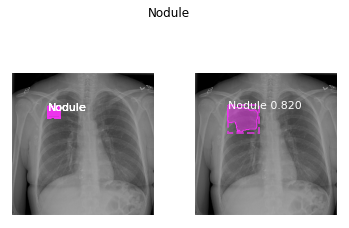

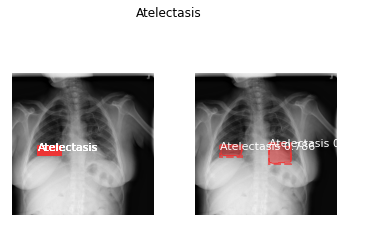

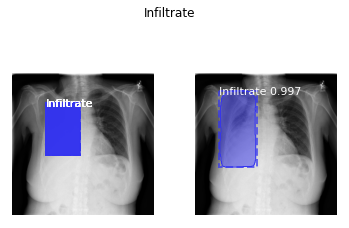

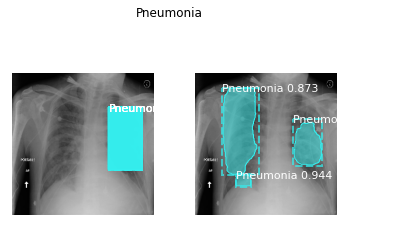

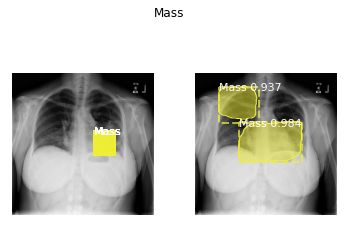

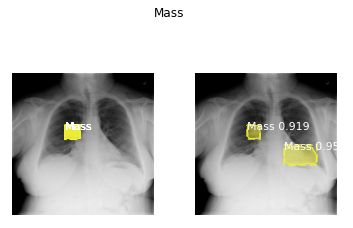

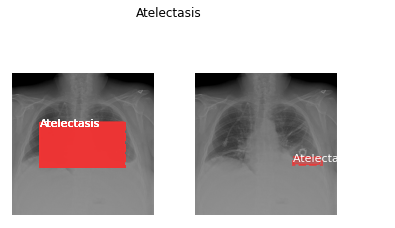

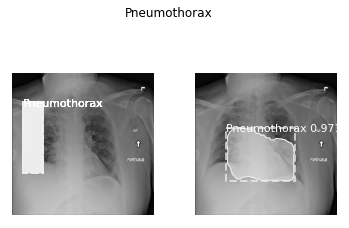

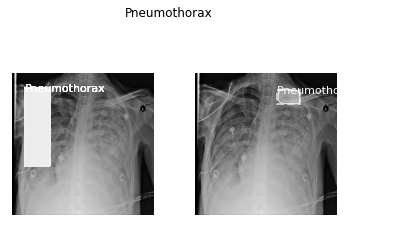

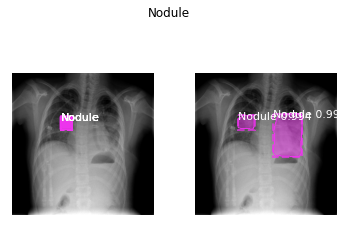

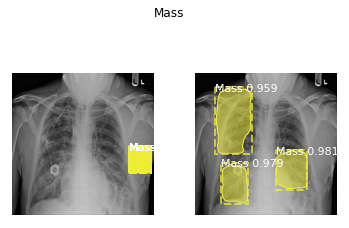

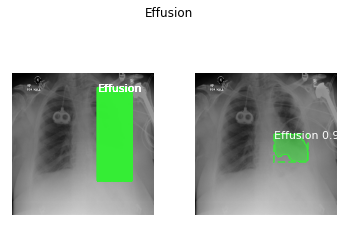

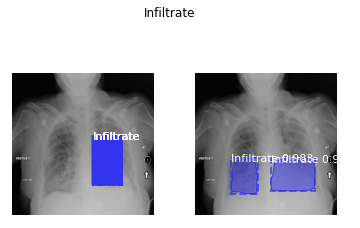

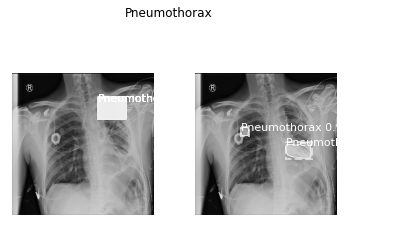

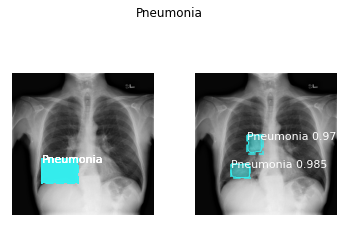

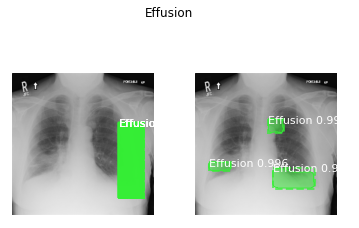

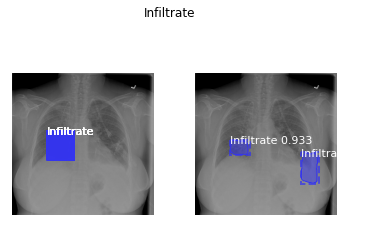

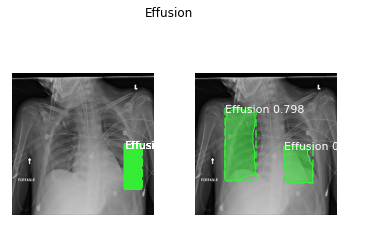

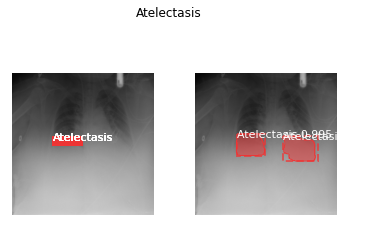

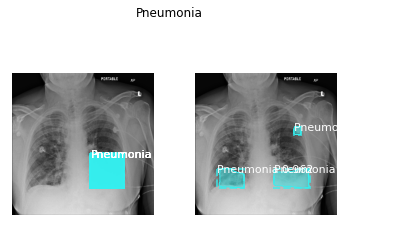

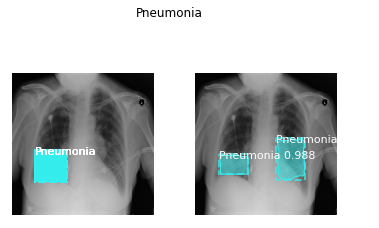

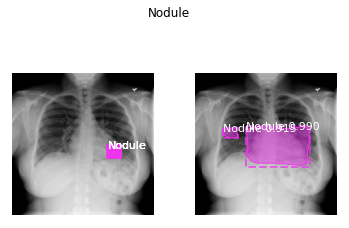

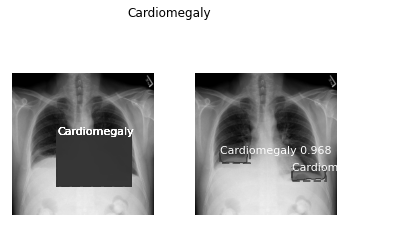

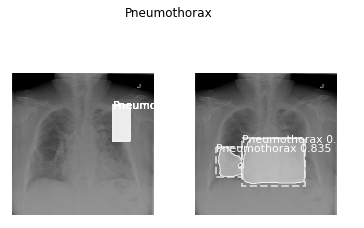

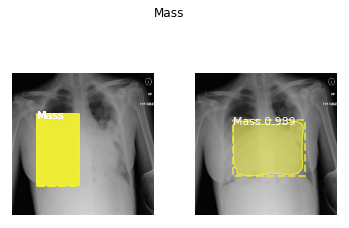

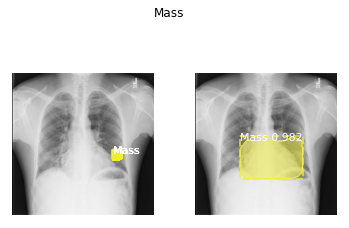

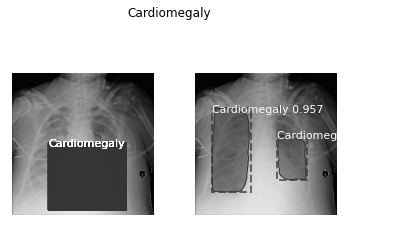

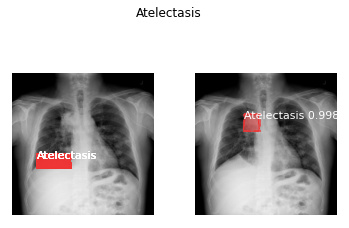

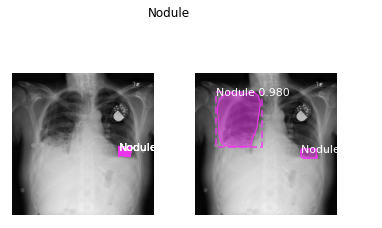

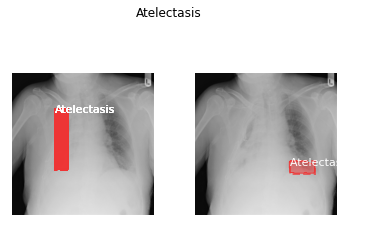

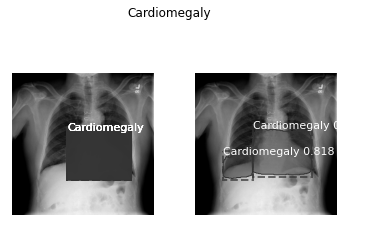

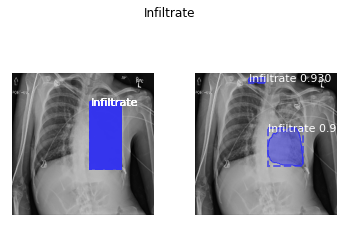

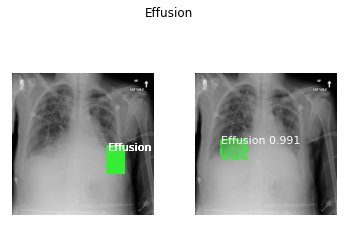

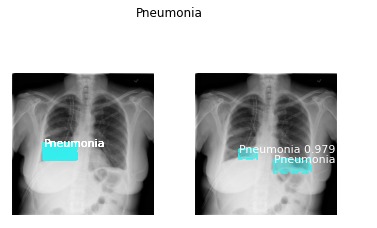

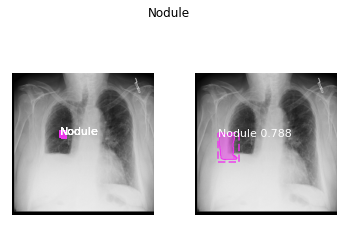

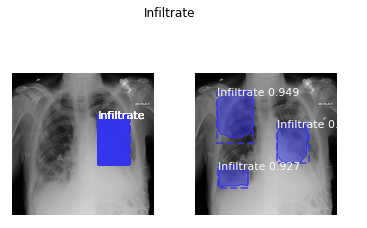

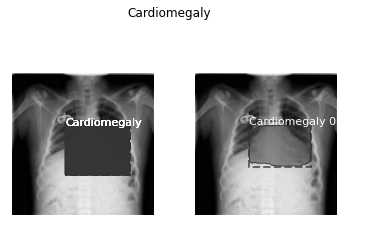

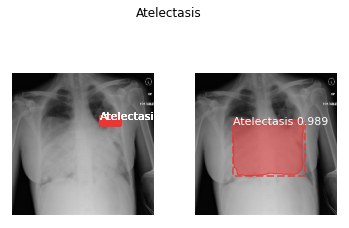

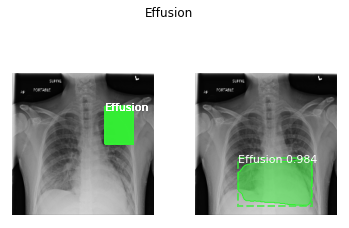

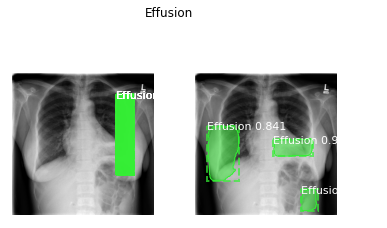

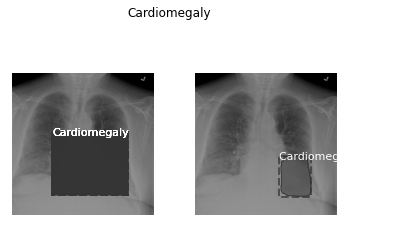

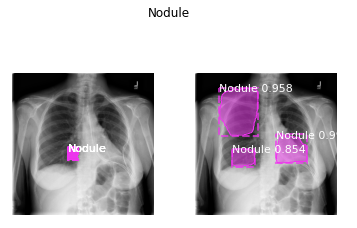

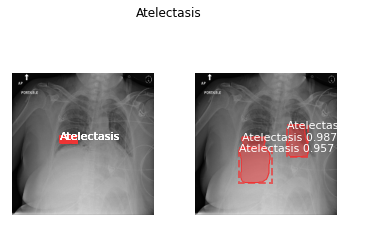

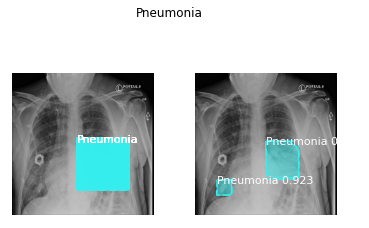

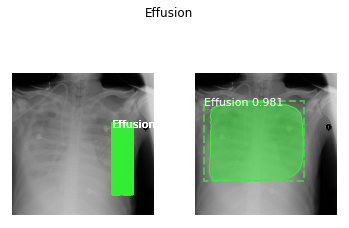

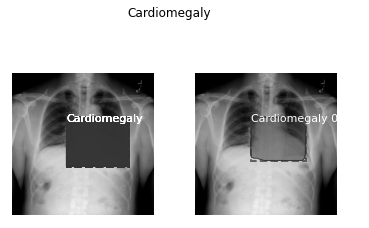

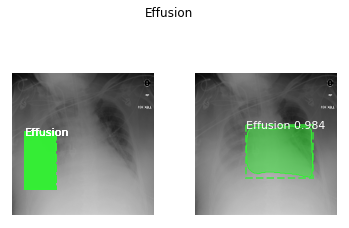

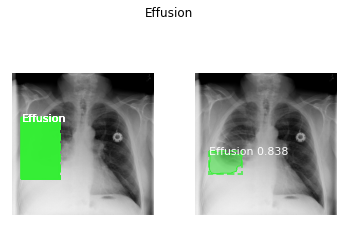

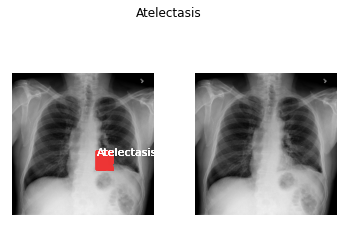

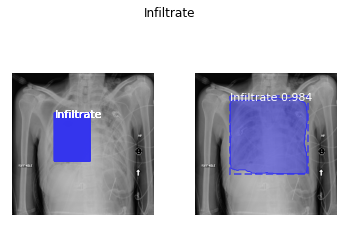

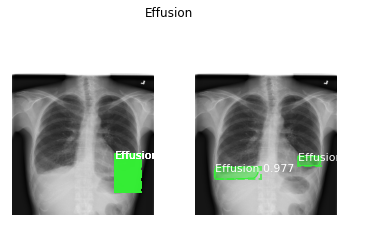

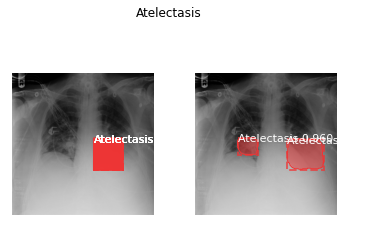

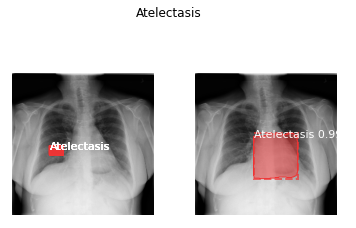

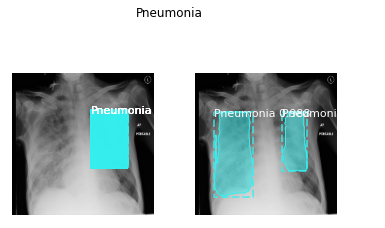

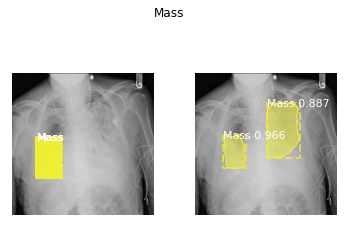

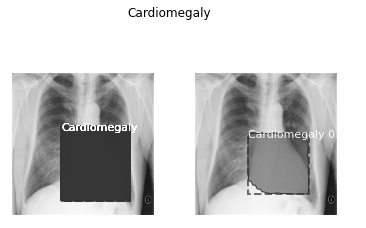

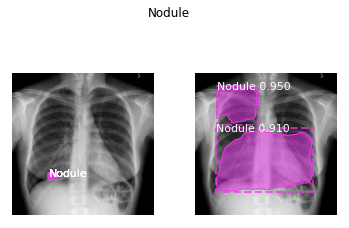

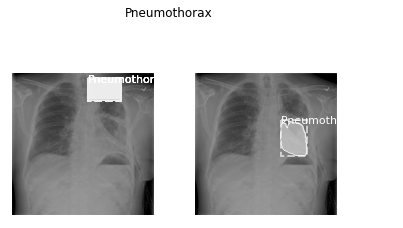

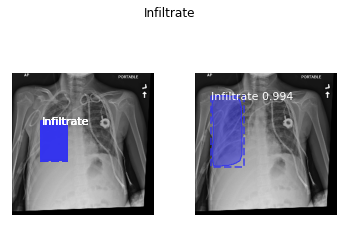

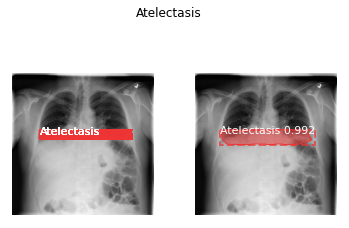

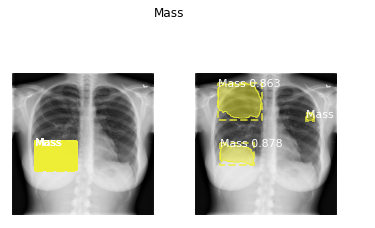

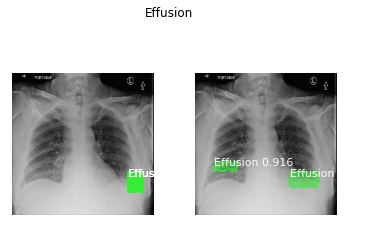

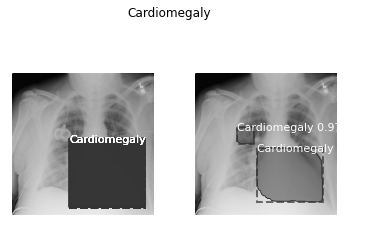

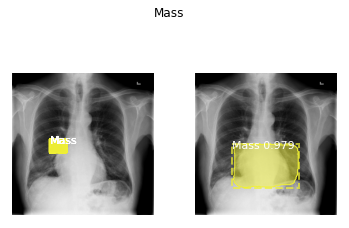

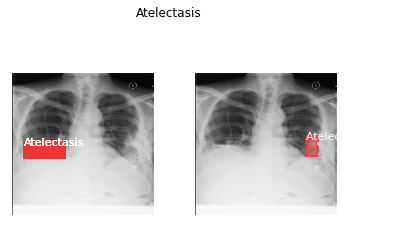

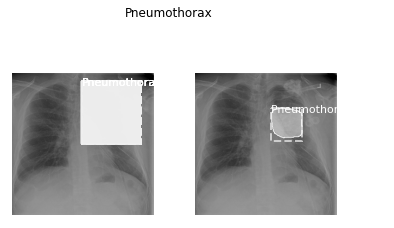

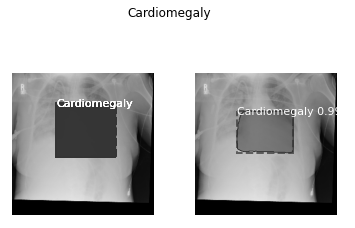

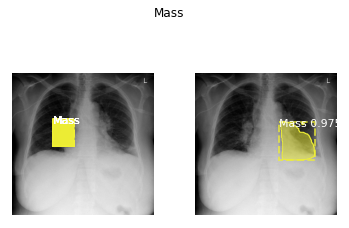

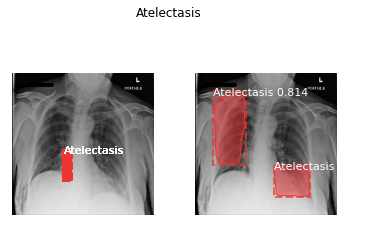

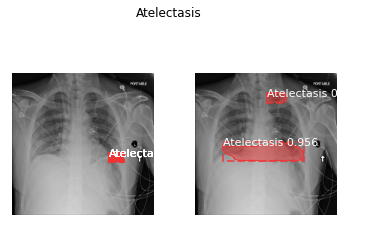

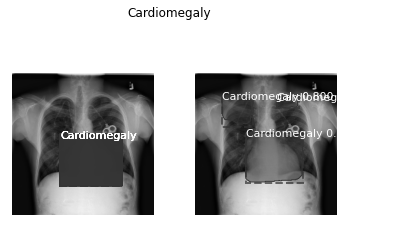

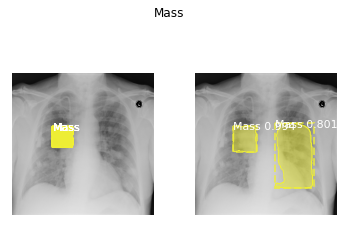

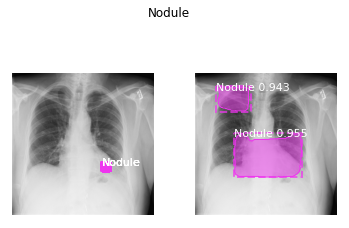

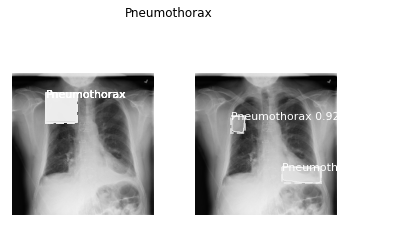

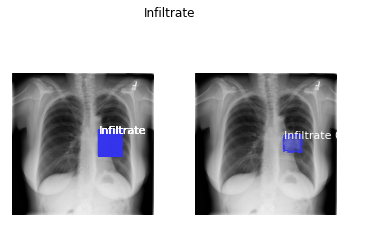

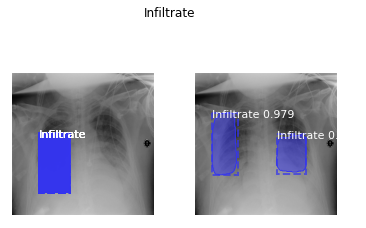

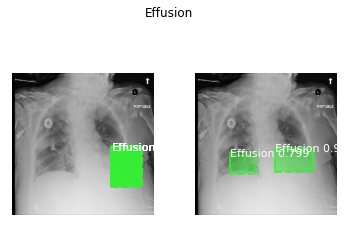

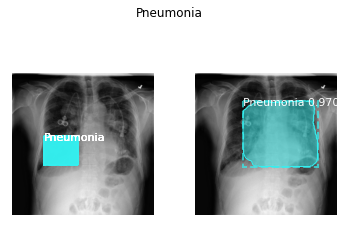

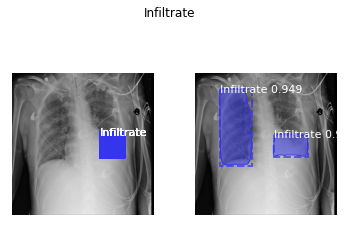

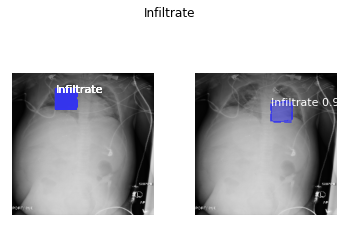

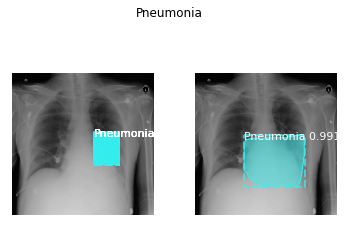

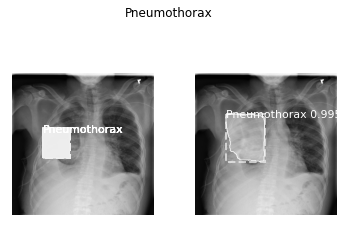

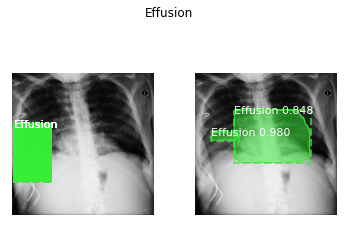

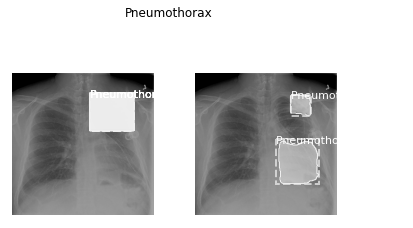

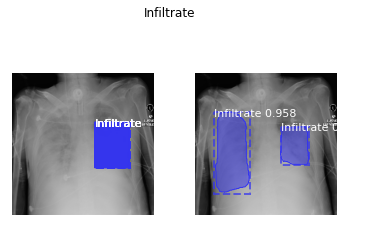

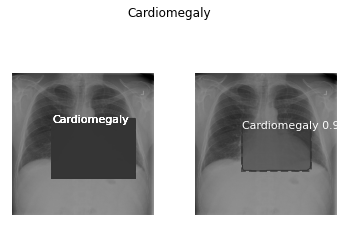

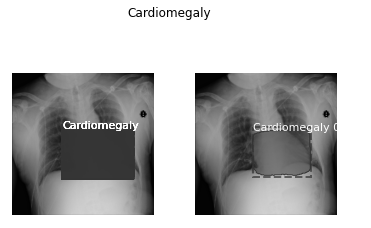

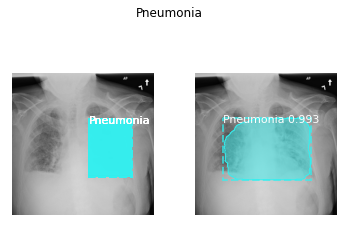

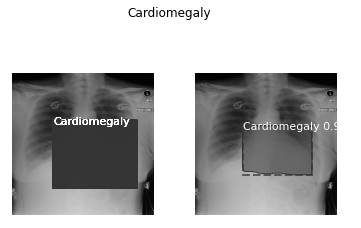

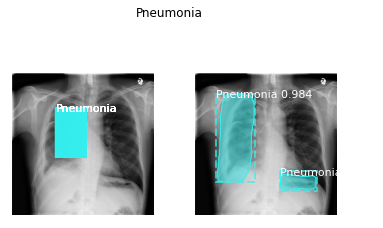

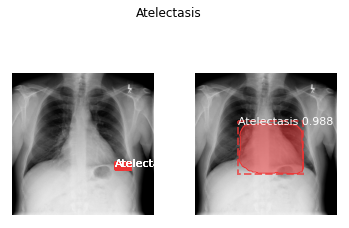

In [34]:
dataset = dataset_val
num_imgs = len(image_annotations_val)
ann_temp = shuffle(image_annotations_val)

for i in range(num_imgs):
    

    image_id = ann_temp.index[i]
    disease = ann_temp.at[image_id,'Finding Label']
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle(disease)
    
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, inference_config, 
                                                                                       image_id, use_mini_mask=False)
    #orig_ids = an_array = np.full(gt_class_id.shape, disease_map[disease])
    
    
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, dataset.class_names, colors=get_colors_for_class_ids(gt_class_id), ax=ax1)
    
    results = model.detect([original_image])
    r = results[0]
    new_ids = an_array = np.full(r['class_ids'].shape, disease_map[disease])
    visualize.display_instances(original_image, r['rois'], r['masks'], new_ids, dataset.class_names, r['scores'], colors=get_colors_for_class_ids(new_ids), ax=ax2)
    try:
        if disease_pkl[disease]:
            plt.savefig(OUTPUT_DIR + disease+'_'+str(image_id)+'.png')
    except:
        continue
    #plt.show()

### Overall IoU and by class

In [35]:
diseases = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

In [36]:
disease_iou = {'Atelectasis': [], 'Cardiomegaly' : [], 'Effusion' : [], 'Infiltrate': [], 'Mass' : [], 'Nodule' : [], 'Pneumonia' : [], 'Pneumothorax' : []}

In [37]:
tot_iou = 0
num_obs = len(image_annotations_val)
all_iou = []

for i in range(num_obs):
    #get the
    
    image_id = ann_temp.index[i]
    disease = ann_temp.at[image_id,'Finding Label']
    
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, inference_config, 
                                                                                       image_id, use_mini_mask=False)
    results = model.detect([original_image])
    r = results[0]
    
    box = gt_bbox[0]
    box_area = box[2]*box[3]
    box = [box[0], box[1], box[0]+box[2], box[1]+box[3]]
    
    boxes = r['rois']
    boxes_area = [b[2]*b[3] for b in boxes]
    boxes = [[b[0], b[1], b[0]+b[2], b[1]+b[3]] for b in boxes]
    #boxes.insert(0,len(boxes))
    box = np.array(box)
    boxes = np.array(boxes)
    box_area = np.array(box_area)
    boxes_area = np.array(boxes_area)
    '''print(box)
    print(boxes)
    print(box_area)
    print(boxes_area)'''
    try:
        iou = utils.compute_iou(box, boxes, box_area,boxes_area).max()
    except:
        iou=0
    disease_iou[disease].append(iou)
    
    tot_iou += iou
    all_iou.append(iou)
    
avg_iou = tot_iou / num_obs

print('The average IoU was:', avg_iou.round(3))
print()
print('Averages by class')
for k in disease_iou.keys():
    print(k + ': ' + str((sum(disease_iou[k])/len(disease_iou[k])).round(3)))
    

The average IoU was: 0.505

Averages by class
Atelectasis: 0.46
Cardiomegaly: 0.818
Effusion: 0.393
Infiltrate: 0.554
Mass: 0.478
Nodule: 0.425
Pneumonia: 0.579
Pneumothorax: 0.227


In [39]:
print()
print('Threshold tests:')
# test
thresholds = [0.1, 0.25, 0.5, 0.75, 0.9]
for threshold in thresholds:
    print("%.2f IoU:" % threshold)
    for k in disease_iou.keys():
        print(k + ': ' + 
              str(round((sum(map(lambda x : 1 if x >= threshold else 0, disease_iou[k]))/len(disease_iou[k])), 3)))
    print()


Threshold tests:
0.10 IoU:
Atelectasis: 0.806
Cardiomegaly: 1.0
Effusion: 0.806
Infiltrate: 0.96
Mass: 0.882
Nodule: 0.938
Pneumonia: 0.958
Pneumothorax: 0.55

0.25 IoU:
Atelectasis: 0.611
Cardiomegaly: 0.967
Effusion: 0.677
Infiltrate: 0.92
Mass: 0.765
Nodule: 0.625
Pneumonia: 0.875
Pneumothorax: 0.4

0.50 IoU:
Atelectasis: 0.472
Cardiomegaly: 0.9
Effusion: 0.419
Infiltrate: 0.64
Mass: 0.353
Nodule: 0.375
Pneumonia: 0.583
Pneumothorax: 0.2

0.75 IoU:
Atelectasis: 0.333
Cardiomegaly: 0.867
Effusion: 0.129
Infiltrate: 0.28
Mass: 0.294
Nodule: 0.188
Pneumonia: 0.333
Pneumothorax: 0.0

0.90 IoU:
Atelectasis: 0.083
Cardiomegaly: 0.3
Effusion: 0.032
Infiltrate: 0.12
Mass: 0.118
Nodule: 0.125
Pneumonia: 0.0
Pneumothorax: 0.0



### Visualizations

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/aed018/.conda/envs/deepmedia/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


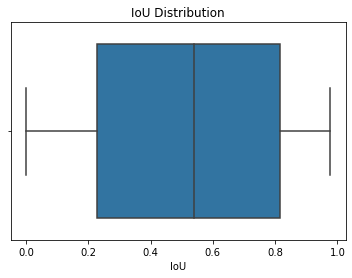

In [41]:
sns.boxplot(all_iou)
plt.xlabel('IoU')
plt.title('IoU Distribution')
plt.show()

/home/aed018/.conda/envs/deepmedia/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/aed018/.conda/envs/deepmedia/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/aed018/.conda/envs/deepmedia/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

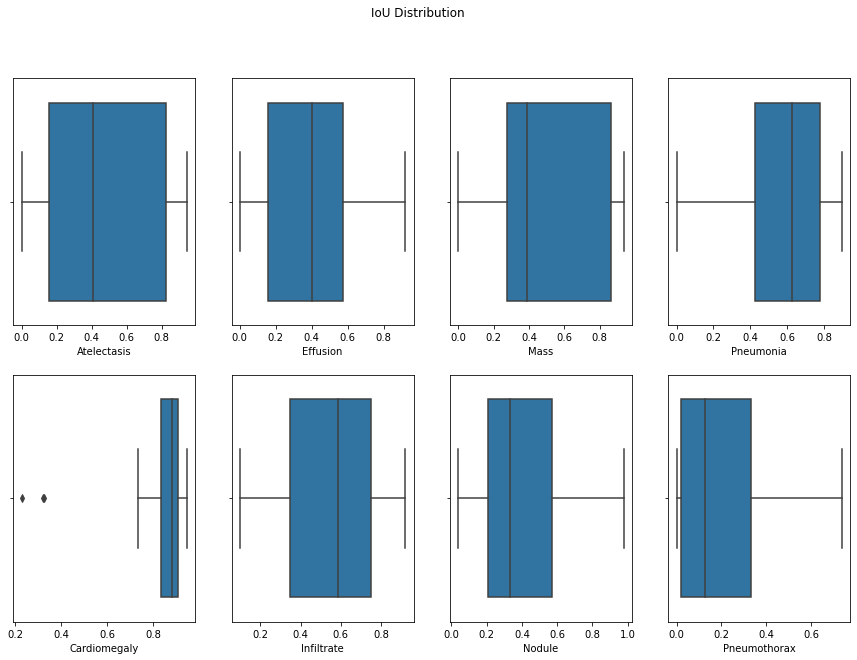

In [42]:
fig, axes = plt.subplots(2,4, figsize=(15,10))
fig.suptitle('IoU Distribution')
i = 0
for disease in disease_iou.keys():
    sns.boxplot(disease_iou[disease], ax=axes[i % 2, i // 2])
    axes[i % 2, i // 2].set_xlabel(disease)
    i +=1

Text(0.5, 1.0, 'IoU Distribution by Disease')

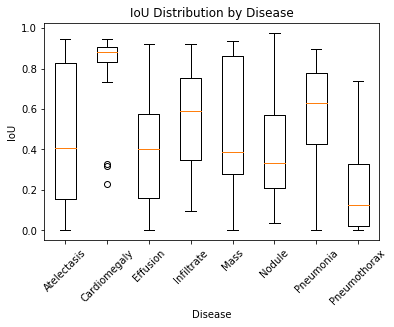

In [43]:
fig, ax = plt.subplots()
ax.boxplot(disease_iou.values())
ax.set_xticklabels(disease_iou.keys(), rotation=45)
ax.set_xlabel('Disease')
ax.set_ylabel('IoU')
ax.set_title('IoU Distribution by Disease')

Text(0.5, 1.0, 'IoU Distribution by Disease')

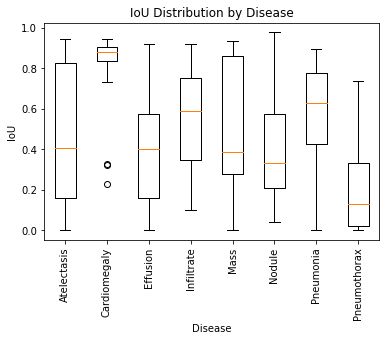

In [44]:
fig, ax = plt.subplots()
ax.boxplot(disease_iou.values())
ax.set_xticklabels(disease_iou.keys(), rotation=90)
ax.set_xlabel('Disease')
ax.set_ylabel('IoU')
ax.set_title('IoU Distribution by Disease')